## Research on sales of video games for an online store to identify patterns that determine whether a given video game will be commercially successful or not.

**Task and Goal:**

Here, we are going to scrutinize and process the given datasets. The final goal is to come up with comprehensible and handy information that will help to identify patterns that determine whether a game succeeds or not.This will allow us to spot potential big winners and plan advertising campaigns. So, initially, we aim at finding the internal connection between different columns or categories of the given dataset.

We will consider the following steps in our whole process and analysis:


-  <a href='#the_destination1'>General Information</a>
-  <a href='#the_destination2'>Data Preprocessing</a>
-  <a href='#the_destination3'>Calculations and adding columns into Table</a>
-  <a href='#the_destination4'>Analysing the data</a>
-  <a href='#the_destination9'>Creating user profile for each region</a>
-  <a href='#the_destination5'>Testing the hypotheses</a>
-  <a href='#the_destination6'>Conclusion</a>


<a id='the_destination1'></a>
### Step 1. Opening the data file and studying the general information. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    games_data = pd.read_csv('datasets/games.csv')
except:
    games_data = pd.read_csv('/datasets/games.csv')

In [3]:
display(games_data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# To check the percentage of missing values for each column
(games_data.isnull().sum() / len(games_data))*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [7]:
print("Number of unique games: ",games_data['Name'].nunique())
print("Number of unique platforms: ",games_data['Platform'].nunique())
print("Number of unique genres: ",games_data['Genre'].nunique())

Number of unique games:  11559
Number of unique platforms:  31
Number of unique genres:  12


<a id='the_destination2'></a>
### Step 2. Data preprocessing and Changing Data types

In [8]:
#To make the column names in lower case
games_data.columns = games_data.columns.str.lower()

In [9]:
# To check the rows where there are are missing values for "name" (and "genre") column
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# To remove the missing rows for "name" and "genre" column 
games_data.dropna(subset = ['name', 'genre'],inplace=True)
games_data = games_data.reset_index(drop=True)


In [11]:
# To fill the missing values of "year_of_release" column, initially, we can use groupby method.
#games_data['year_of_release'] = games_data.groupby(['name','genre'])['year_of_release'].transform(lambda x: x.fillna(x.median())).round()

# Still there are are some missing values in "year_of_release" column,
# we can drop/remove those rows

games_data = games_data[games_data['year_of_release'].notna()].reset_index(drop=True)


In [12]:
# To convert the data type of 'year_of_release'] column from 'float' into 'int'
games_data['year_of_release'] = games_data['year_of_release'].astype(int)    

In [13]:
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
games_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [15]:
games_data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [16]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors = 'coerce')
# It will turn the column into float64 and all the "tbd" will be turned into missing values
games_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<a id='the_destination21'></a>

In [17]:
# Here, we have filled the missing values of user_score with the value -1. Indeed, the user_score can not be negative in this case. 
# So, considering this unreal value will help us to avoid complexity of having missing values in future. and still can be found easily if necessary.
games_data['user_score'] = games_data['user_score'].fillna(-1)

In [18]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [19]:
games_data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [20]:
# We will assign a new group group named "NAY" (Not Assigned Yet) and all missing values for "rating" column will be consider under group.
games_data['rating'] = games_data['rating'].fillna("NAY")

In [21]:
# We will not process the missing values of "critic_score" column since it is a complex issue and
# it will not impact much in our analysis.
games_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating                0
dtype: int64

In [22]:
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NAY
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NAY


In [23]:
print(f"Number of year_of_releasess in the given dataset: {games_data['year_of_release'].nunique()}")
print(f"Max year_of_releases in the given dataset: {games_data['year_of_release'].max()}")
print(f"Min year_of_releases in the given dataset: {games_data['year_of_release'].min()}")

Number of year_of_releasess in the given dataset: 37
Max year_of_releases in the given dataset: 2016
Min year_of_releases in the given dataset: 1980


In [24]:
display(games_data[games_data[games_data.columns.tolist()].duplicated()==True])

# To check if there are 'duplicates' : No duplicates indeed

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


 <a id='the_destination3'></a>
#### Adding columns and performing calculations

In [25]:
# We can create a new column ('total_sales') to show the sum of sales for different regions (na_sales + eu_sales + jp_sales +other_sales)
games_data['total_sales'] = games_data["na_sales"] +  games_data["eu_sales"] + games_data["jp_sales"] + games_data["other_sales"]
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NAY,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NAY,31.38


<a id='the_destination4'></a>
# Step 3. Analyze the data

### Exploratory Data Analysis

In [26]:
# To see how many games were released in different years
games_data['year_of_release'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

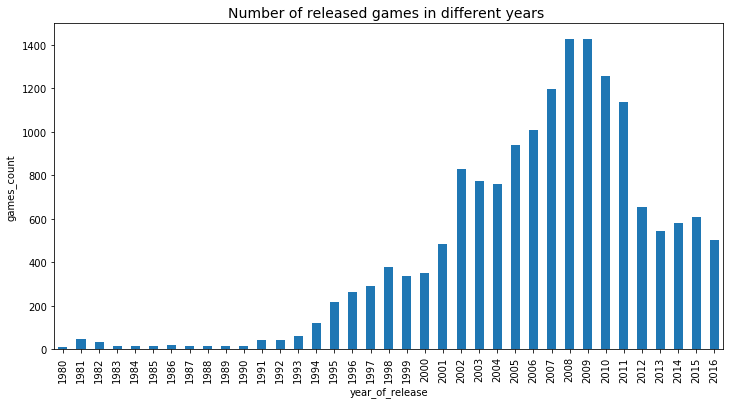

In [27]:
(games_data.groupby('year_of_release')['name'].count()).plot(kind='bar', figsize=(12,6))
plt.title('Number of released games in different years ', size =14)
plt.xlabel('year_of_release')
plt.ylabel('games_count')
plt.show()

In [28]:
games_data['platform'].value_counts().head()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: platform, dtype: int64

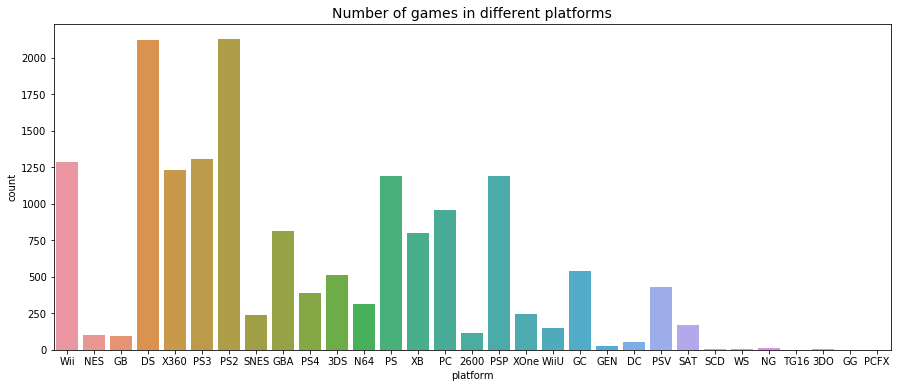

In [29]:
# To visualize the number of games released per platform
plt.figure(figsize=(15,6))
plt.title('Number of games in different platforms', fontsize=14)
sns.countplot(x='platform',data=games_data)

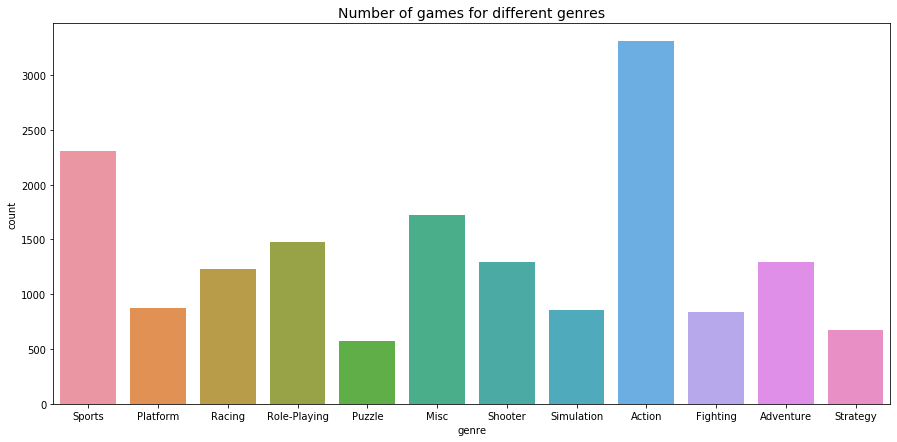

In [30]:
# To visualize the number of games released per genre
plt.figure(figsize=(15,7))
plt.title('Number of games for different genres', fontsize=14)
sns.countplot(x='genre',data=games_data)

In [31]:
groupby_games1 = games_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()
groupby_games1

platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: total_sales, Length: 238, dtype: float64

In [32]:
# Total_Slaes in different platforms
total_sales_platform = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#total_sales_platform

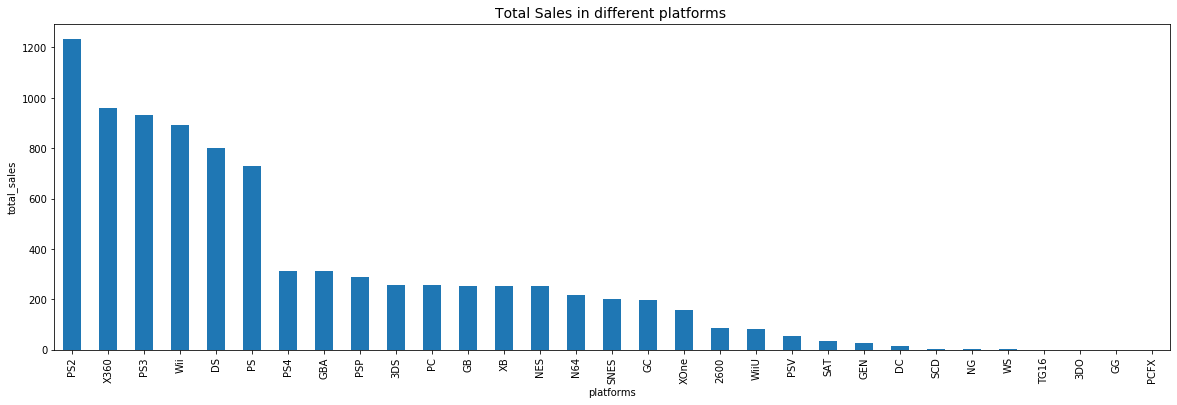

In [33]:
# Total_Slaes in different platforms
total_sales_platform.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize=(20,6))
plt.title('Total Sales in different platforms ', size =14)
plt.xlabel('platforms')
plt.ylabel('total_sales')
plt.show()

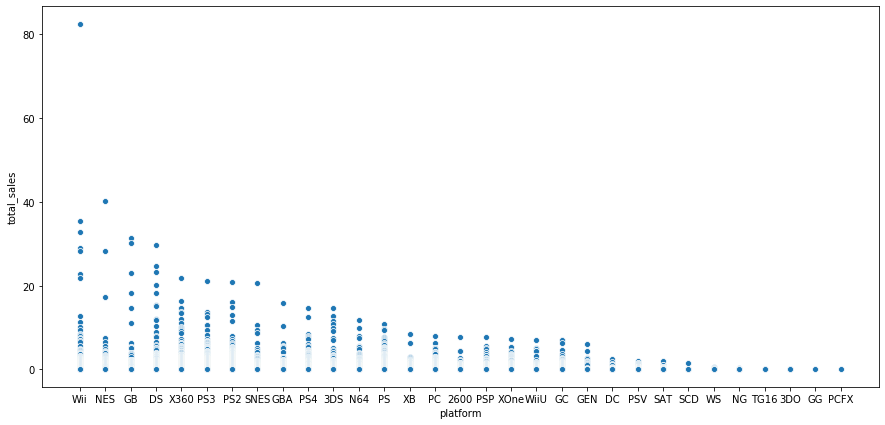

In [34]:
# Total_Slaes in different platforms [ visualizing points (platform, total_sales) ]
plt.figure(figsize=(15,7))
sns.scatterplot(data=games_data,x="platform",y="total_sales")

In [35]:
# Total_Slaes in different years
year_sales = games_data.groupby( 'year_of_release')['total_sales'].sum()
year_sales.head()

year_of_release
1980    11.38
1981    35.68
1982    28.88
1983    16.80
1984    50.35
Name: total_sales, dtype: float64

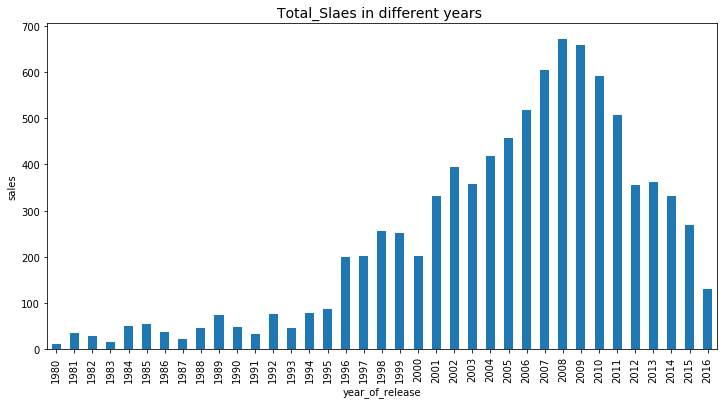

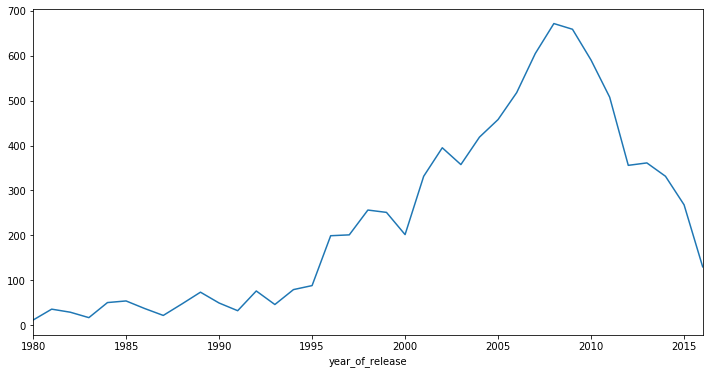

In [36]:
# Total_Slaes in different years
year_sales.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize=(12,6))
plt.title('Total_Slaes in different years ', size =14)
plt.ylabel('sales')
plt.show()

# Total_Slaes in different years
games_data.groupby(['year_of_release'])['total_sales'].sum().plot(kind = 'line', x = 'year_of_release', y = 'total_sales', figsize = (12,6))
plt.show()

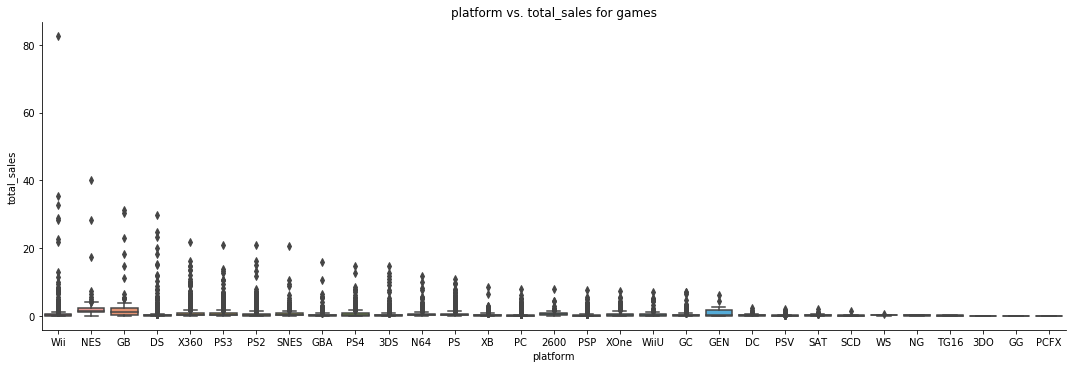

In [37]:
sns.catplot(x="platform", y="total_sales", kind="box",height=5, aspect=18/6, data=games_data).set(title='platform vs. total_sales for games')

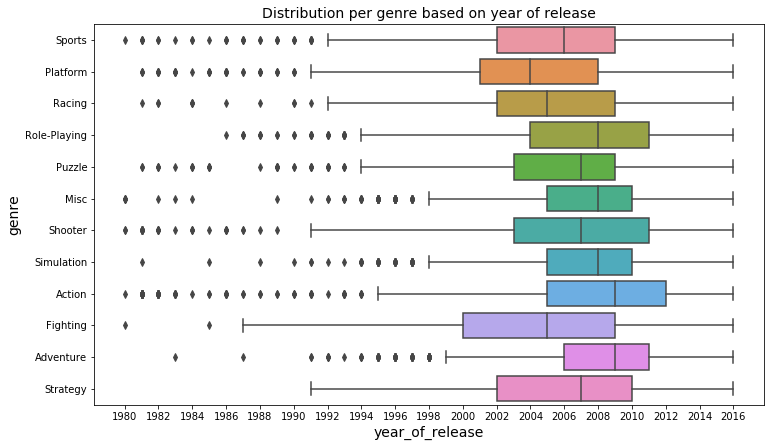

In [38]:
# How were the relesed games distributed per genre

fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(data=games_data, x='year_of_release', y='genre', ax=ax)
plt.xticks(np.arange(1980,2018,2))
#plt.tight_layout()
plt.title('Distribution per genre based on year of release', fontsize=14)
plt.xlabel('year_of_release', fontsize=14)
plt.ylabel('genre', fontsize=14);

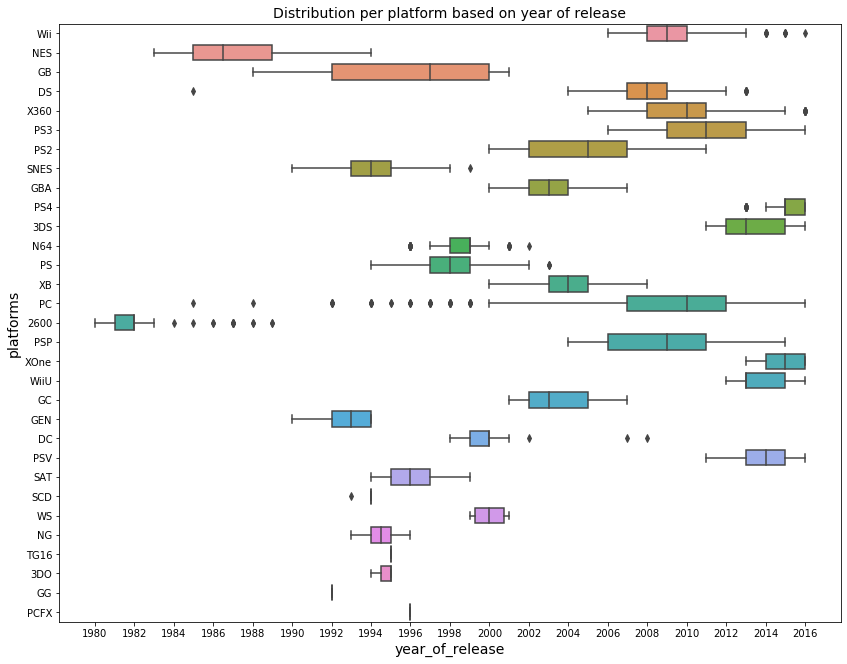

In [39]:
#How were released games  distributed per platform

fig, ax = plt.subplots(figsize=(14, 11))

sns.boxplot(data=games_data, x='year_of_release', y='platform', ax=ax)
plt.xticks(np.arange(1980,2018,2))
#plt.tight_layout()
plt.title('Distribution per platform based on year of release', fontsize=14)
plt.xlabel('year_of_release', fontsize=14)
plt.ylabel('platforms', fontsize=14);

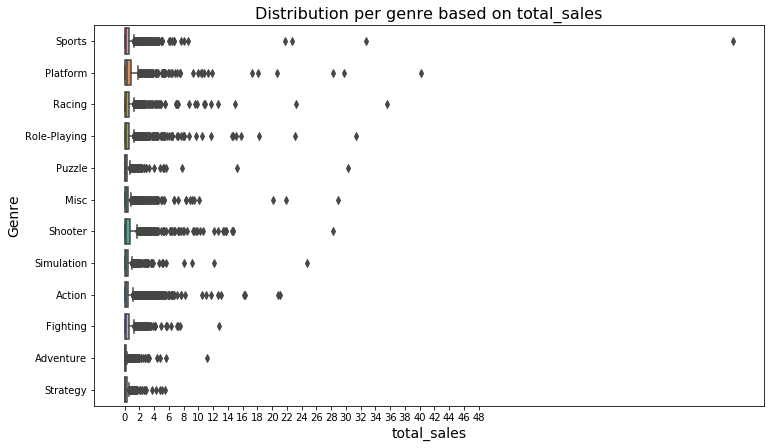

In [40]:
#How were the released games distributed per genre

fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(data=games_data, x='total_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,50,2))
#plt.tight_layout()
plt.title('Distribution per genre based on total_sales', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('Genre', fontsize=14);

### Analysis with filtered data 

In [41]:
print("Total sales from 2015 based on platform:")
print(games_data.query('year_of_release == 2015').groupby('platform')['total_sales'].sum().sort_values(ascending=False))
print()
print()
print("Total sales in 2016 based on platform:")
print(games_data.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False))

Total sales from 2015 based on platform:
platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64


Total sales in 2016 based on platform:
platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


In [42]:
filt_games_data = games_data.query('year_of_release >= 2013')
filt_games_data = filt_games_data.reset_index()
filt_games_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NAY,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-1.0,NAY,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [43]:
print("Number of unique games: ",filt_games_data['name'].nunique())
print("Number of unique platforms: ",filt_games_data['platform'].nunique())
print("Number of unique genres: ",filt_games_data['genre'].nunique())

Number of unique games:  1263
Number of unique platforms:  11
Number of unique genres:  12


In [44]:
# To see how many games were released in different years
filt_games_data['year_of_release'].value_counts()

2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: int64

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64


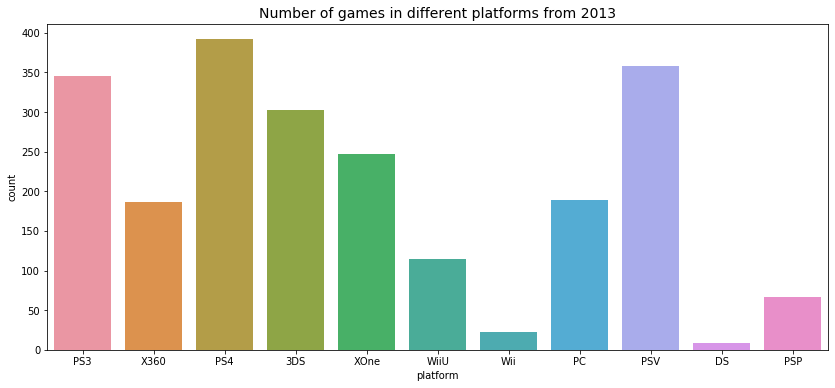

In [45]:
# To visualize the number of games released per platform
plt.figure(figsize=(14,6))
plt.title('Number of games in different platforms from 2013', fontsize=14)
sns.countplot(x='platform',data=filt_games_data)


print(filt_games_data['platform'].value_counts())

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64


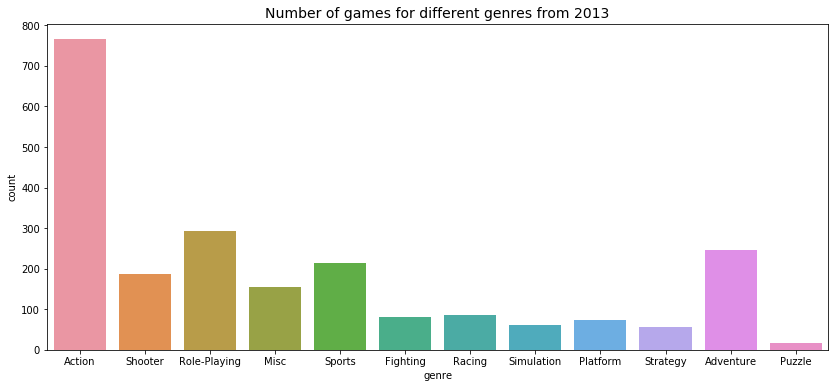

In [46]:
# To visualize the number of games released per genre
plt.figure(figsize=(14,6))
plt.title('Number of games for different genres from 2013', fontsize=14)
sns.countplot(x='genre',data=filt_games_data)

print(filt_games_data['genre'].value_counts())

In [47]:
# showing total_sales for different years for different platforms
groupby_filt_games1 = filt_games_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()
groupby_filt_games1

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [48]:
# Total_Slaes in different platforms
total_sales_platform = filt_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#total_sales_platform

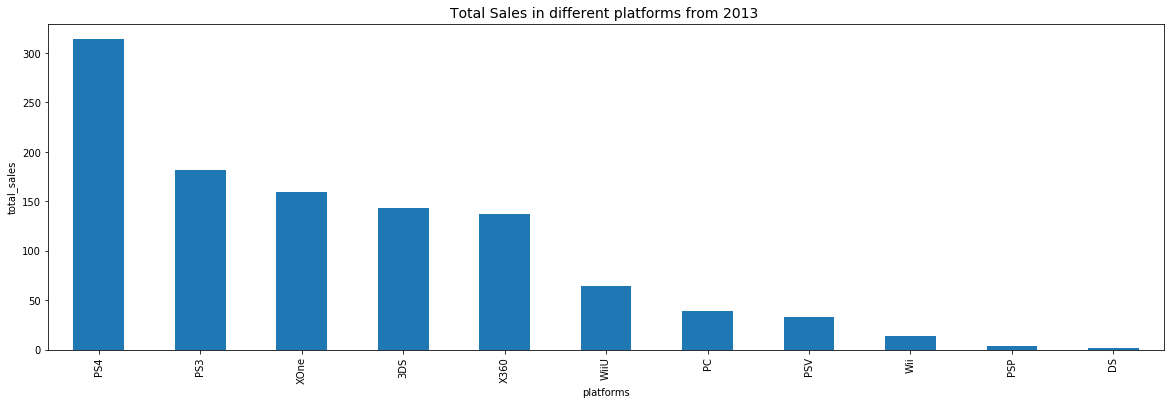

In [49]:
# Total_Slaes in different platforms
total_sales_platform.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize=(20,6))
plt.title('Total Sales in different platforms from 2013 ', size =14)
plt.xlabel('platforms')
plt.ylabel('total_sales')
plt.show()

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


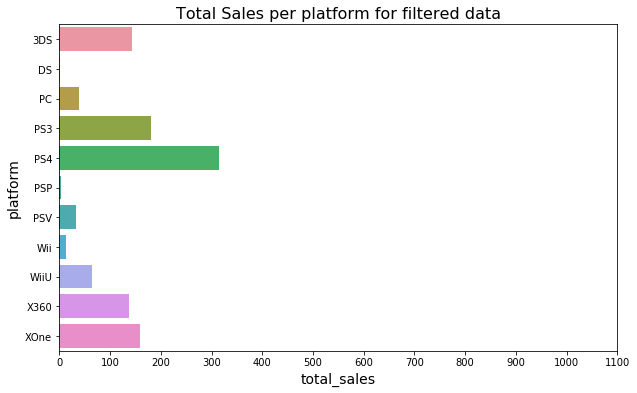

In [50]:
# How were the released games distributed per platform

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('platform')['total_sales'].sum().reset_index(), x='total_sales', y='platform', ax=ax)
plt.xticks(np.arange(0,1200,100))
#plt.tight_layout()
plt.title('Total Sales per platform for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('platform', fontsize=14);

print(filt_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

Text(0.5, 1.0, 'Platform Ratio')

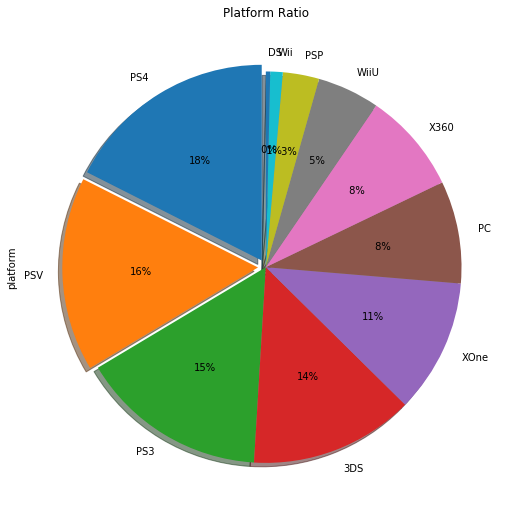

In [51]:
filt_games_data['platform'].value_counts().plot(kind='pie',autopct='%2.f%%',figsize=(9,9),startangle=90,explode=[0.04,0.04,0,0,0,0,0,0,0,0,0],shadow=True)

plt.title('Platform Ratio')

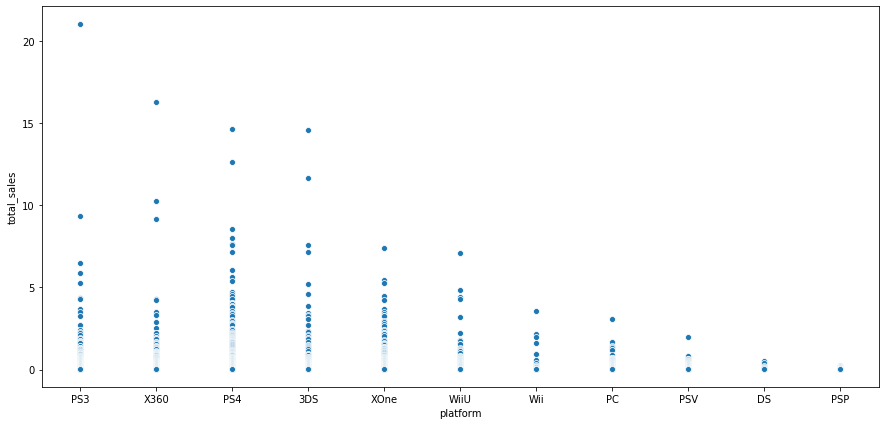

In [52]:
# Total_Slaes in different platforms
plt.figure(figsize=(15,7))
sns.scatterplot(data=filt_games_data,x="platform",y="total_sales")

In [53]:
# Total_Slaes in different years
year_sales = filt_games_data.groupby( 'year_of_release')['total_sales'].sum()
year_sales.head()

year_of_release
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64

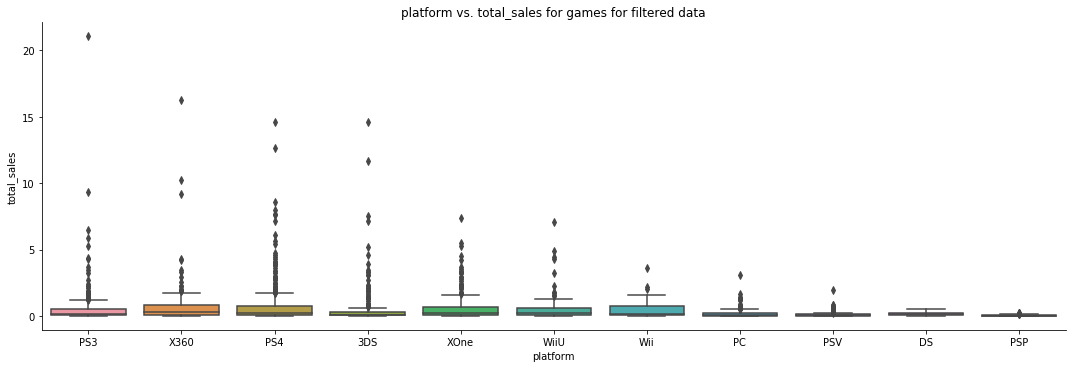

In [54]:
sns.catplot(x="platform", y="total_sales", kind="box",height=5, aspect=18/6, data=filt_games_data).set(title='platform vs. total_sales for games for filtered data')

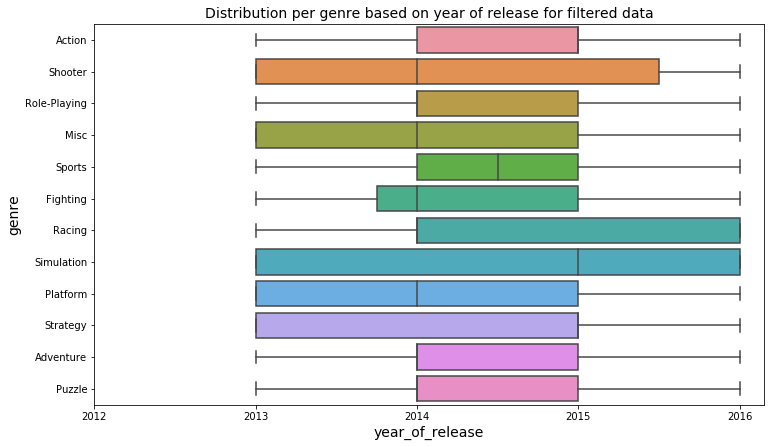

In [55]:
# How were the relesed games distributed per genre

fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(data=filt_games_data, x='year_of_release', y='genre', ax=ax)
plt.xticks(np.arange(2012,2017,1))
#plt.tight_layout()
plt.title('Distribution per genre based on year of release for filtered data', fontsize=14)
plt.xlabel('year_of_release', fontsize=14)
plt.ylabel('genre', fontsize=14);

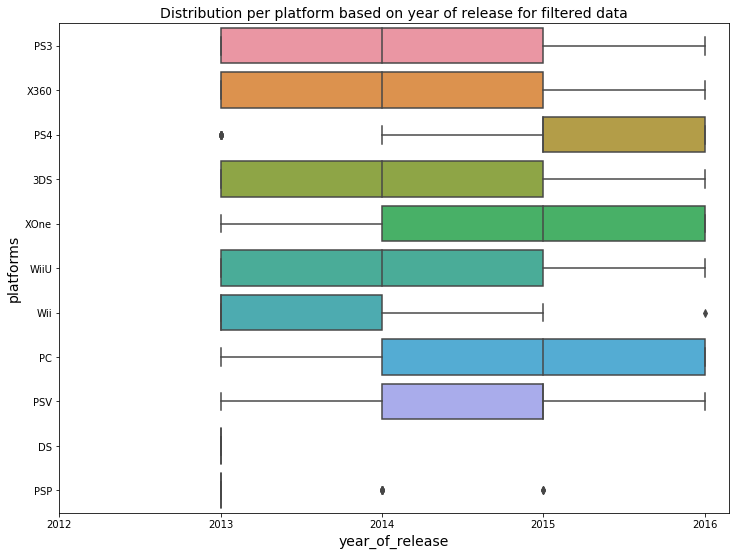

In [56]:
#How were released games  distributed per platform

fig, ax = plt.subplots(figsize=(12, 9))

sns.boxplot(data=filt_games_data, x='year_of_release', y='platform', ax=ax)
plt.xticks(np.arange(2012,2017,1))
#plt.tight_layout()
plt.title('Distribution per platform based on year of release for filtered data', fontsize=14)
plt.xlabel('year_of_release', fontsize=14)
plt.ylabel('platforms', fontsize=14);

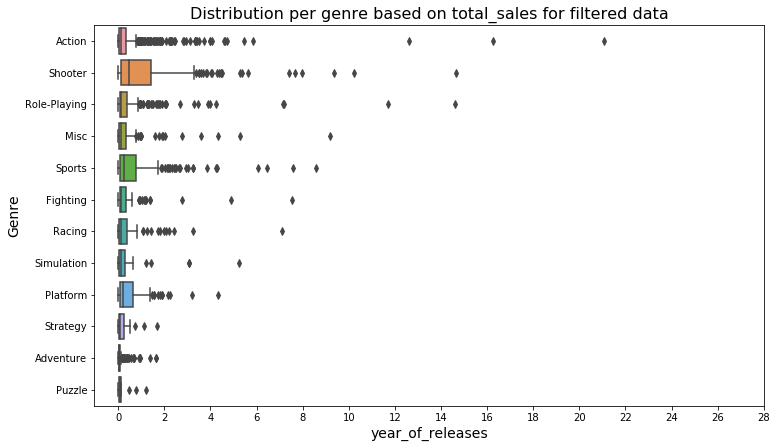

In [57]:
#How were the released games distributed per genre

fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(data=filt_games_data, x='total_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,30,2))
#plt.tight_layout()
plt.title('Distribution per genre based on total_sales for filtered data', fontsize=16)
plt.xlabel('year_of_releases', fontsize=14)
plt.ylabel('Genre', fontsize=14);

Text(0.5, 1.0, 'Genre Ratio')

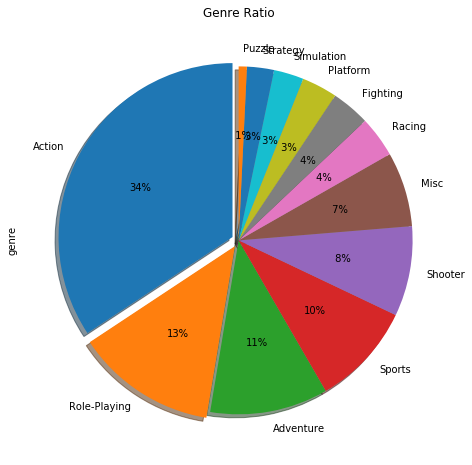

In [58]:
filt_games_data['genre'].value_counts().plot(kind='pie',autopct='%2.f%%',figsize=(8,8),startangle=90,explode=[0.04,0.04,0,0,0,0,0,0,0,0,0,0],shadow=True)

plt.title('Genre Ratio')

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


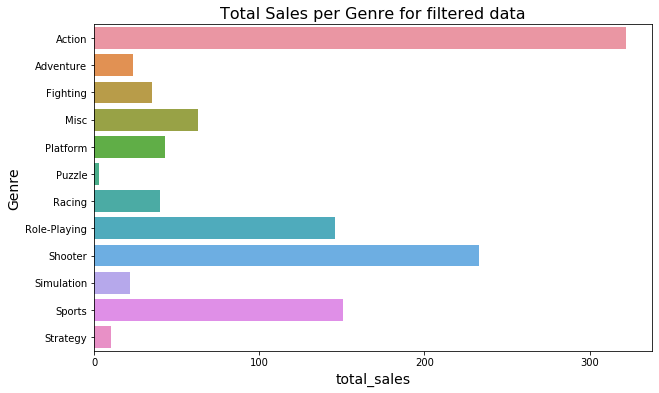

In [59]:
#How were the released games distributed per genre

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('genre')['total_sales'].sum().reset_index(), x='total_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,400,100))
#plt.tight_layout()
plt.title('Total Sales per Genre for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('Genre', fontsize=14);

print(filt_games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

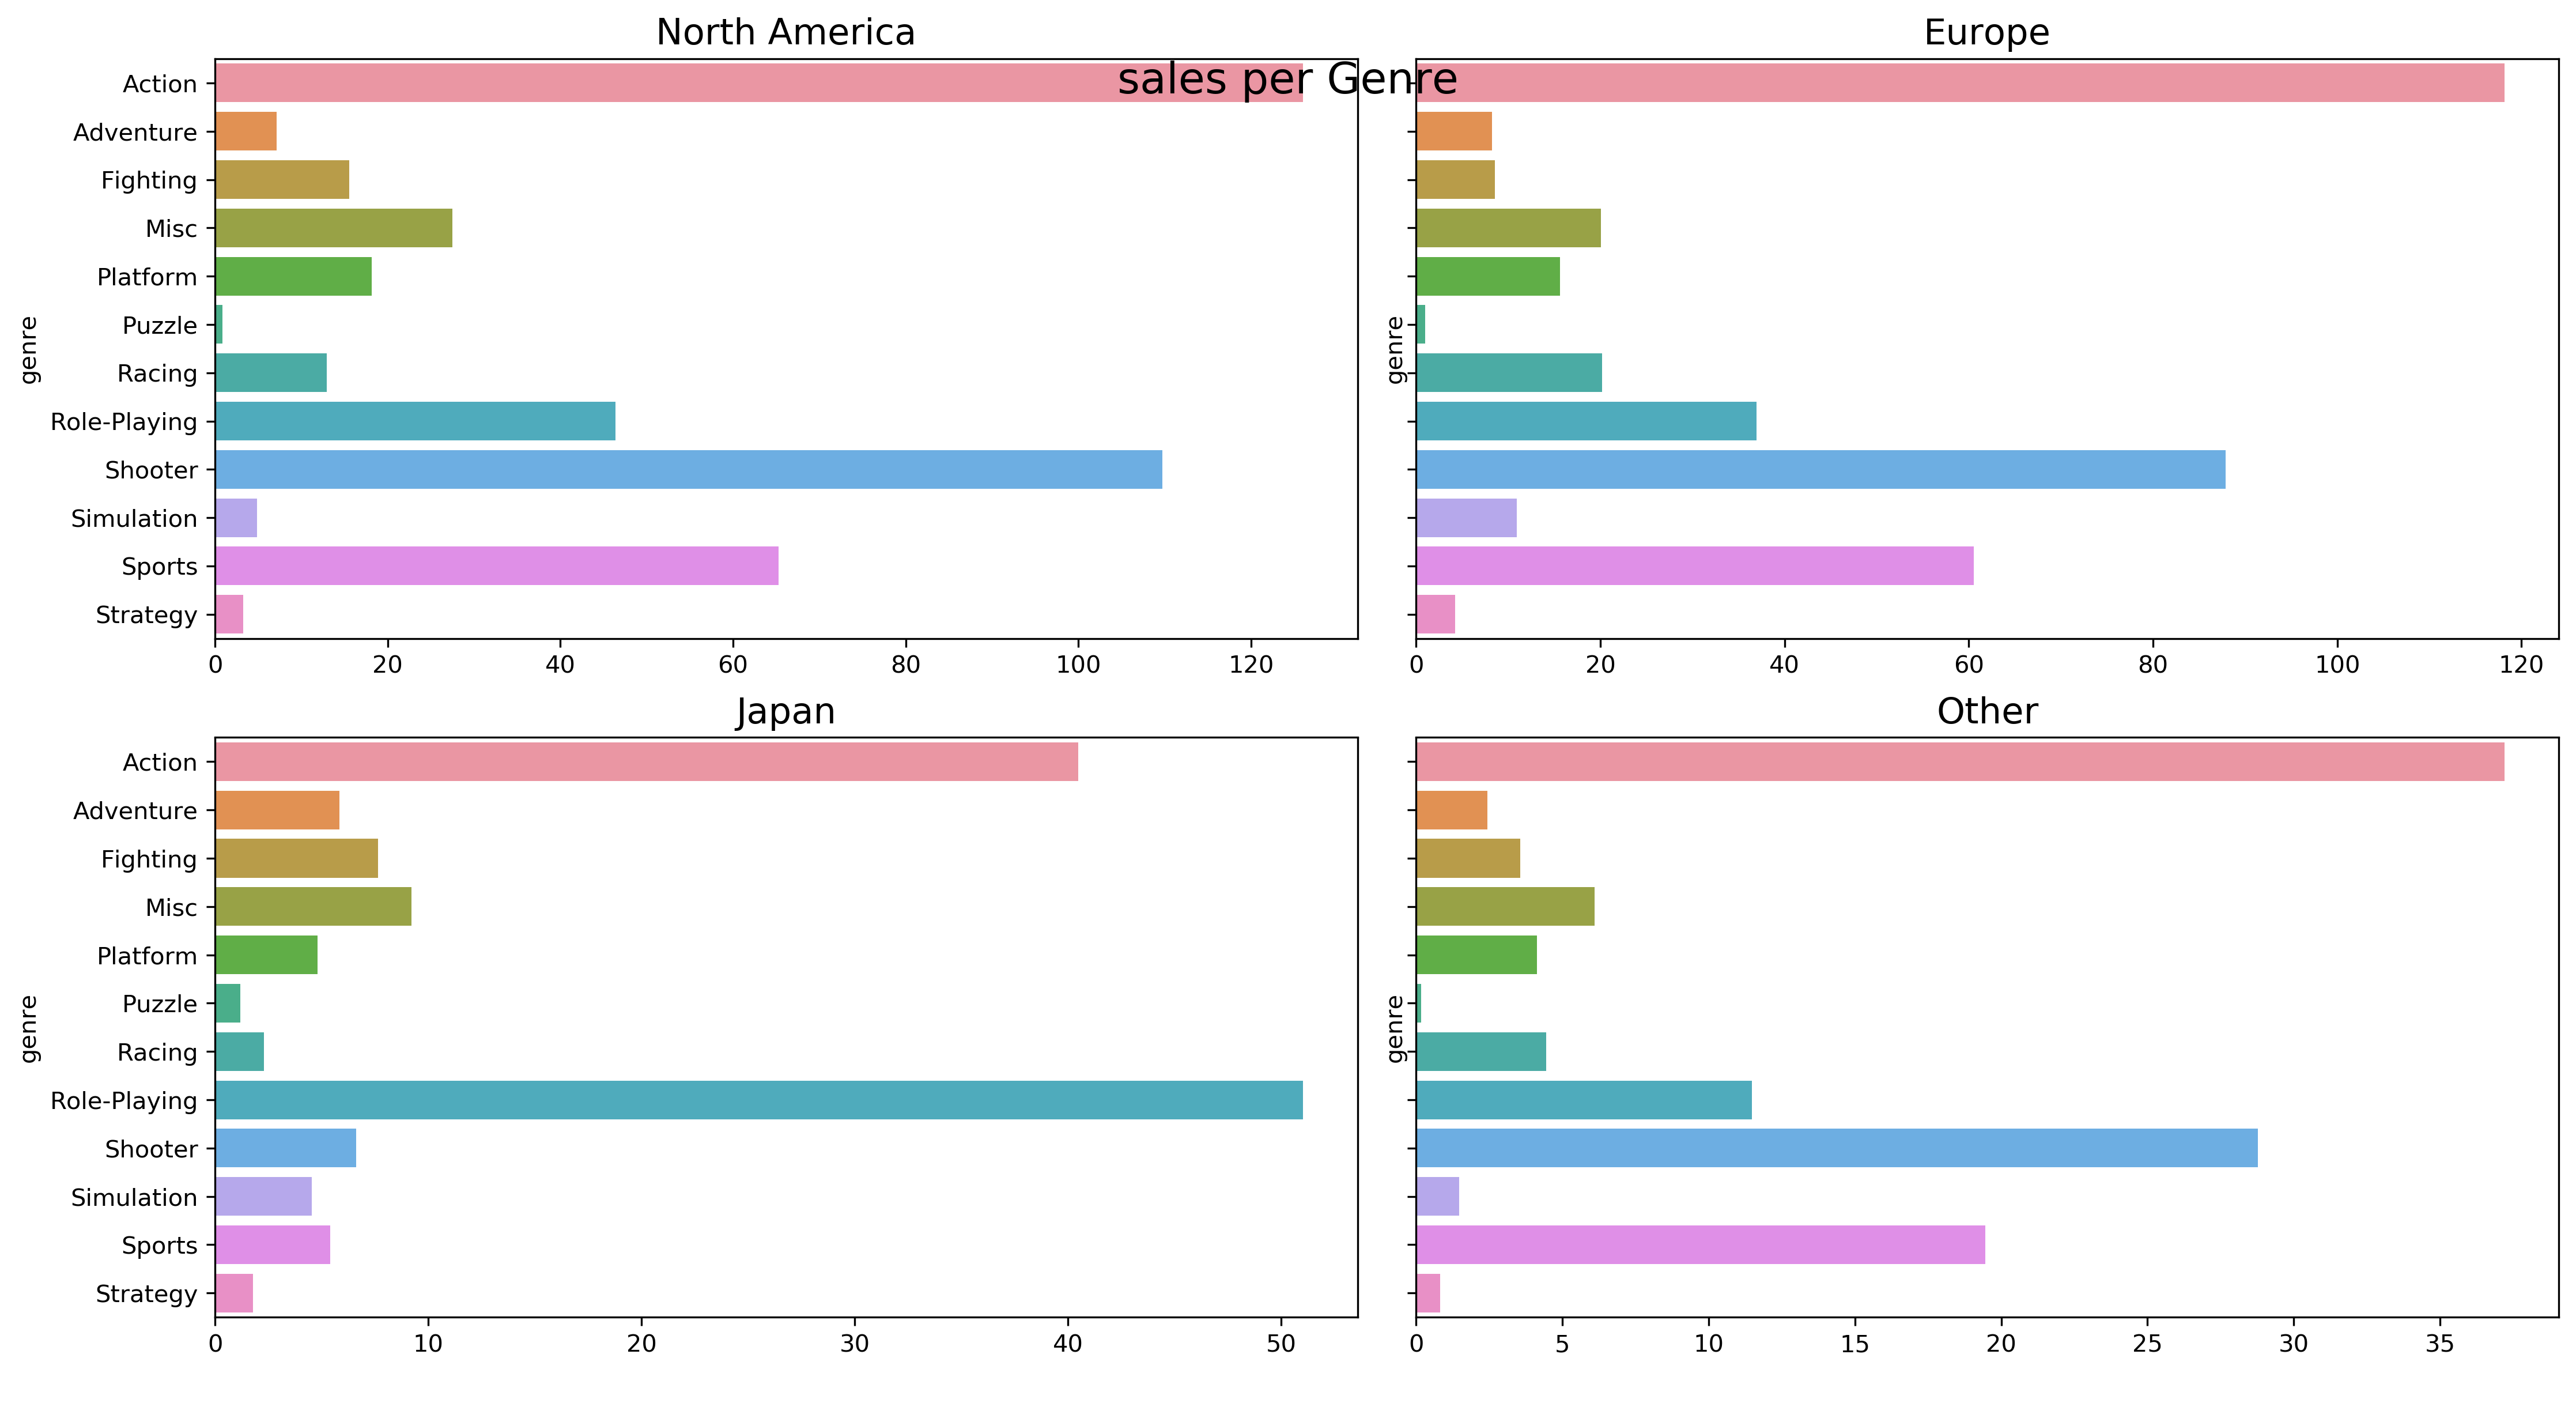

In [60]:
genreGroup = filt_games_data.groupby('genre')

filt_na_sales_by_genre = genreGroup['na_sales'].sum().reset_index()
filt_eu_sales_by_genre = genreGroup['eu_sales'].sum().reset_index()
filt_jp_sales_by_genre = genreGroup['jp_sales'].sum().reset_index()
filt_other_sales_by_genre = genreGroup['other_sales'].sum().reset_index()

fig, axes = plt.subplots(2,2, figsize=(15,8), dpi=300, sharey=True)
fig.suptitle('sales per Genre', fontsize=18)

sns.barplot(ax=axes[0][0], data=filt_na_sales_by_genre, y='genre', x='na_sales')
sns.barplot(ax=axes[0][1], data=filt_eu_sales_by_genre, y='genre', x='eu_sales')
sns.barplot(ax=axes[1][0], data=filt_jp_sales_by_genre, y='genre', x='jp_sales')
sns.barplot(ax=axes[1][1], data=filt_other_sales_by_genre, y='genre', x='other_sales')
plt.tight_layout()


fontsize = 15
labels = [['North America', 'Europe'], ['Japan', 'Other']]

for x in range(2):
    for y in range(2):
        axes[x][y].set_title(labels[x][y], fontsize=fontsize)
        axes[x][y].set_xlabel('  ')

In [61]:
sales_platform1 = (filt_games_data.groupby("platform")['total_sales'].sum())
print(sales_platform1)

avg_sales_platform2 = sales_platform1 /len(sales_platform1)
print(avg_sales_platform2)

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: total_sales, dtype: float64
platform
3DS     13.022727
DS       0.140000
PC       3.584545
PS3     16.493636
PS4     28.558182
PSP      0.318182
PSV      2.999091
Wii      1.241818
WiiU     5.875455
X360    12.436364
XOne    14.483636
Name: total_sales, dtype: float64


In [62]:
# We can get idea of growth of sales from scores  by looking at the correlation matrix of sales vs scores
correlation_matrix1= filt_games_data.pivot_table(index='index', values=['total_sales', 'critic_score', 'user_score'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237071CAE08>,
      dtype=object)

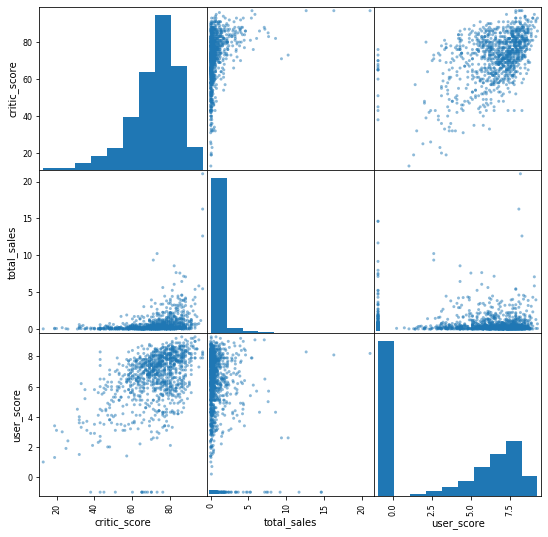

In [63]:
pd.plotting.scatter_matrix(correlation_matrix1, figsize=(9,9))

In [64]:
print(correlation_matrix1.corr())

              critic_score  total_sales  user_score
critic_score      1.000000     0.313700    0.473949
total_sales       0.313700     1.000000    0.155227
user_score        0.473949     0.155227    1.000000


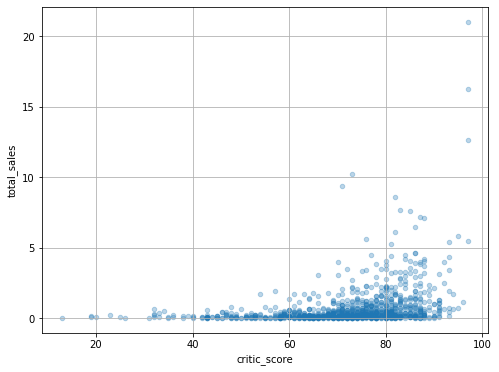

In [65]:
filt_games_data.plot(x='critic_score', y='total_sales', kind='scatter' , alpha=0.3 ,  figsize=(8, 6),  grid=True) 

In [66]:
# We can get idea of growth of sales from scores  by looking at the correlation matrix of sales vs scores for PS4 platform
correlation_matrix_ps4 = filt_games_data.query('platform == "PS4" & user_score >0').pivot_table(index='index', values=['total_sales', 'critic_score', 'user_score'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023706218708>,
      dtype=object)

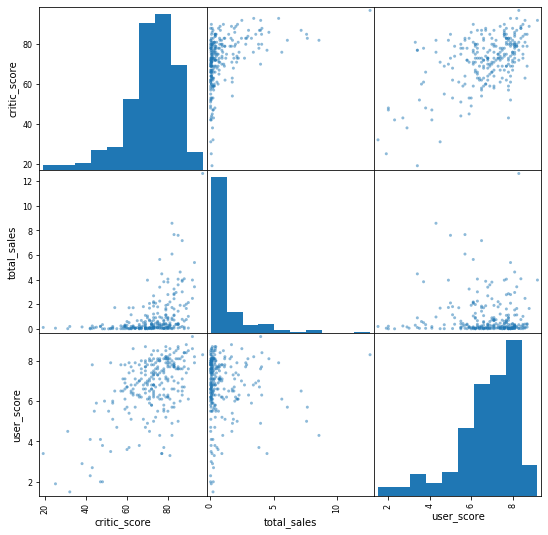

In [67]:
pd.plotting.scatter_matrix(correlation_matrix_ps4, figsize=(9,9))

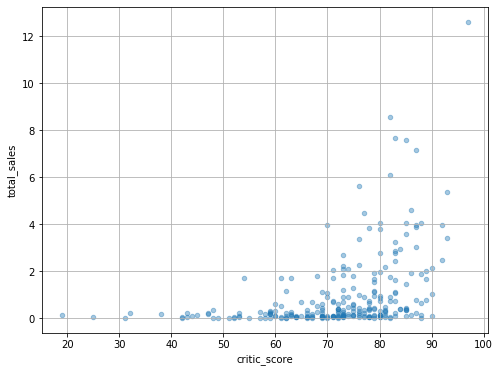

In [68]:
filt_games_data.query('platform == "PS4" & user_score >0 ').plot(x='critic_score', y='total_sales', kind='scatter' , alpha=0.4 ,  figsize=(8, 6),  grid=True) 

In [69]:
print(correlation_matrix_ps4.corr())

              critic_score  total_sales  user_score
critic_score      1.000000     0.405895    0.557654
total_sales       0.405895     1.000000   -0.031957
user_score        0.557654    -0.031957    1.000000


<a id='the_destination9'></a>
### Creating user profile for each region

In [70]:
filt_games_data['rating'].value_counts()

NAY     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

**Region : North America (NA)**

In [71]:
top_5_platform_na = filt_games_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_5_platform_na

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

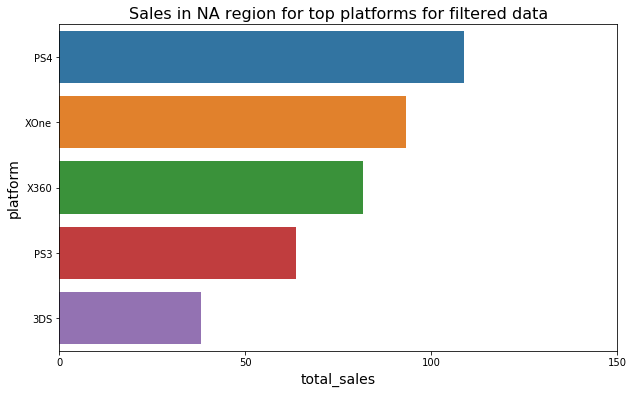

In [72]:
# How were the released games distributed for top platform in NA

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index(), x='na_sales', y='platform', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in NA region for top platforms for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('platform', fontsize=14);

#print(filt_games_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())

In [73]:
top_5_genre_na = filt_games_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_5_genre_na

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

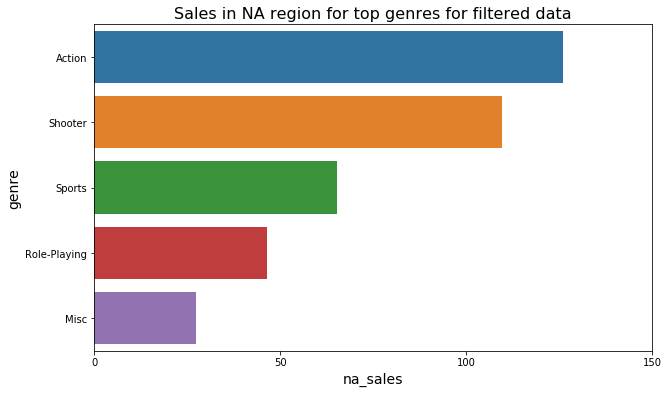

In [74]:
# How were the released games distributed for top genres in NA

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index(), x='na_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in NA region for top genres for filtered data', fontsize=16)
plt.xlabel('na_sales', fontsize=14)
plt.ylabel('genre', fontsize=14);

#print(filt_games_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

In [75]:
esrb_na = filt_games_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_na

rating
M       165.21
NAY      89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

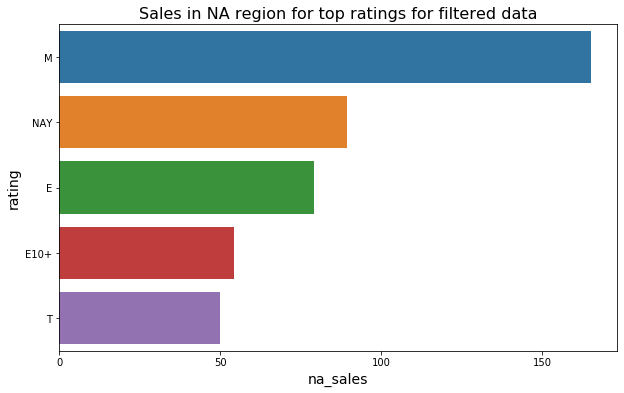

In [76]:
# How were the released games distributed for top ratings in NA

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head().reset_index(), x='na_sales', y='rating', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in NA region for top ratings for filtered data', fontsize=16)
plt.xlabel('na_sales', fontsize=14)
plt.ylabel('rating', fontsize=14);

**Region : European Union (EU)**

In [77]:
top_5_platform_eu = filt_games_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_platform_eu

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

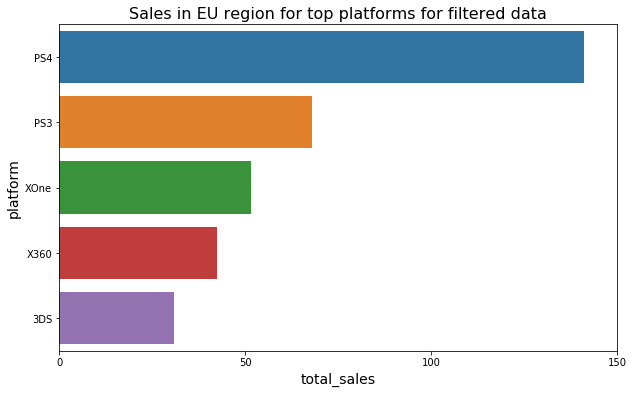

In [78]:
# How were the released games distributed for top platform in EU

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(), x='eu_sales', y='platform', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in EU region for top platforms for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('platform', fontsize=14);


In [79]:
top_5_genre_eu = filt_games_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_genre_eu

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

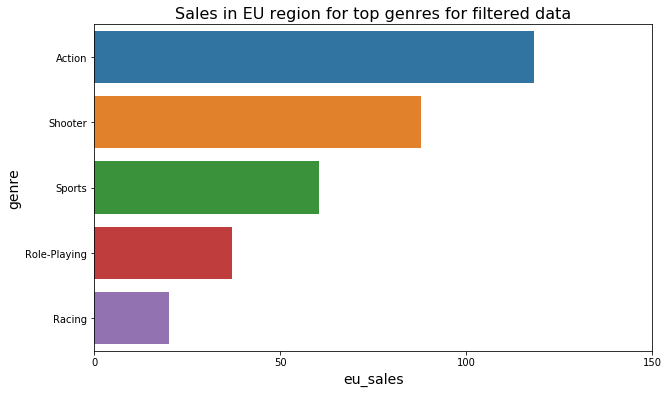

In [80]:
# How were the released games distributed for top genres in EU

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(), x='eu_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in EU region for top genres for filtered data', fontsize=16)
plt.xlabel('eu_sales', fontsize=14)
plt.ylabel('genre', fontsize=14);

In [81]:
esrb_eu = filt_games_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_eu

rating
M       145.32
E        83.36
NAY      78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

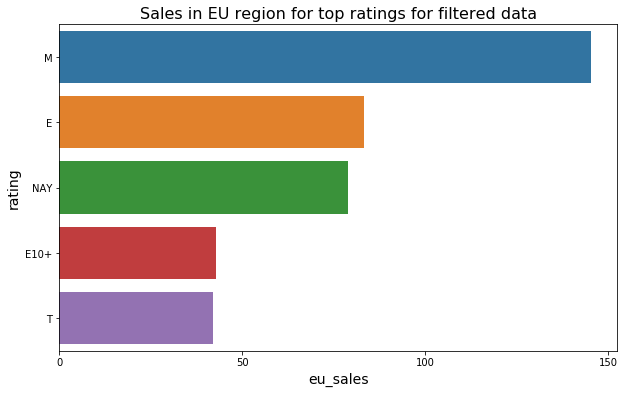

In [82]:
# How were the released games distributed for top ratings in EU

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(), x='eu_sales', y='rating', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in EU region for top ratings for filtered data', fontsize=16)
plt.xlabel('eu_sales', fontsize=14)
plt.ylabel('rating', fontsize=14);

**Region : Japan (JP)**

In [83]:
top_5_platform_jp = filt_games_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_platform_jp

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

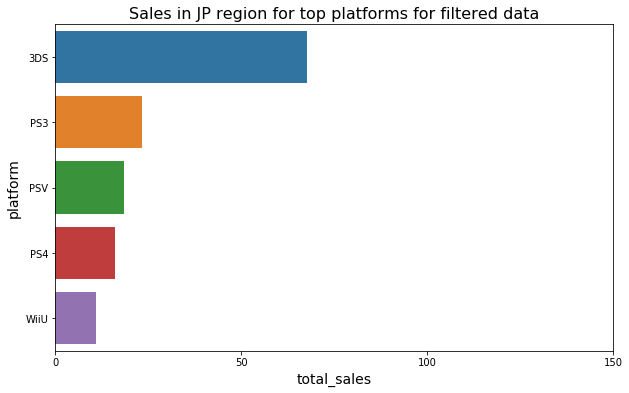

In [84]:
# How were the released games distributed for top platform in JP

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(), x='jp_sales', y='platform', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in JP region for top platforms for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('platform', fontsize=14);

In [85]:
top_5_genre_jp = filt_games_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_genre_jp

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

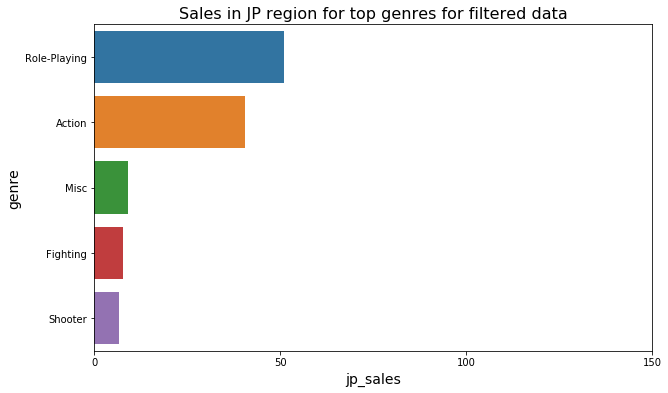

In [86]:
# How were the released games distributed for top genres in JP

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(), x='jp_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in JP region for top genres for filtered data', fontsize=16)
plt.xlabel('jp_sales', fontsize=14)
plt.ylabel('genre', fontsize=14);

In [87]:
esrb_jp = filt_games_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_jp

rating
NAY     85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

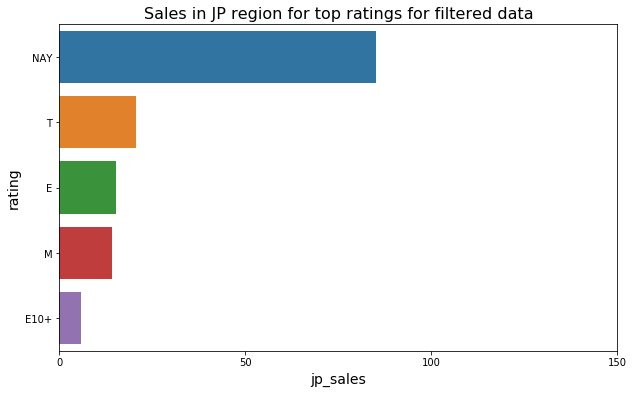

In [88]:
# How were the released games distributed for top ratings in JP

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(), x='jp_sales', y='rating', ax=ax)
plt.xticks(np.arange(0,200,50))
#plt.tight_layout()
plt.title('Sales in JP region for top ratings for filtered data', fontsize=16)
plt.xlabel('jp_sales', fontsize=14)
plt.ylabel('rating', fontsize=14);

**Region : Global**

In [89]:
top_5_platform_global = filt_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_5_platform_global

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

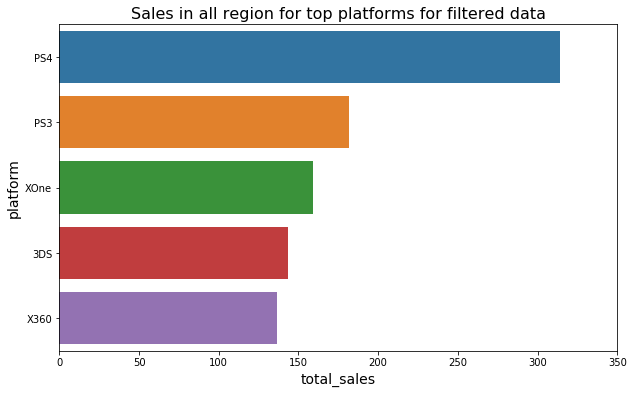

In [90]:
# How were the released games distributed for top platform in total

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().reset_index(), x='total_sales', y='platform', ax=ax)
plt.xticks(np.arange(0,400,50))
#plt.tight_layout()
plt.title('Sales in all region for top platforms for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('platform', fontsize=14);

In [91]:
top_5_genre_global = filt_games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head()
top_5_genre_global

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64

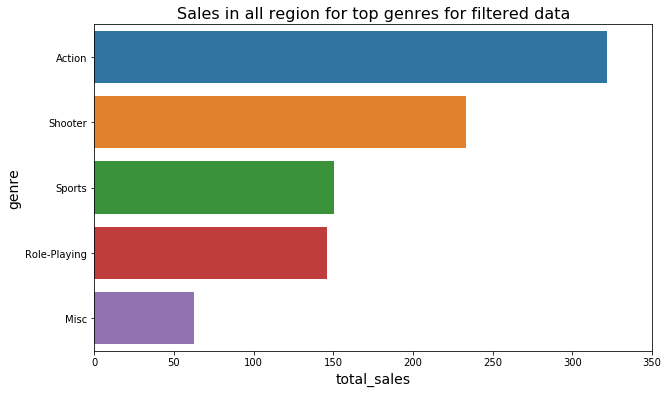

In [92]:
# How were the released games distributed for top genre in total

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head().reset_index(), x='total_sales', y='genre', ax=ax)
plt.xticks(np.arange(0,400,50))
#plt.tight_layout()
plt.title('Sales in all region for top genres for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('genre', fontsize=14);

In [93]:
esrb_global = filt_games_data.groupby('rating')['total_sales'].sum().sort_values(ascending=False)
esrb_global

rating
M       371.68
NAY     276.84
E       200.16
T       126.62
E10+    115.39
Name: total_sales, dtype: float64

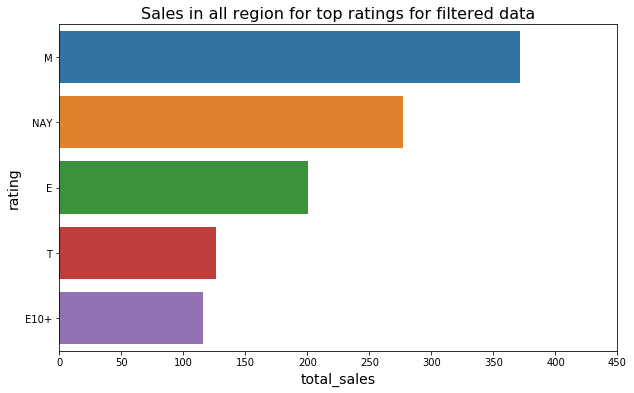

In [94]:
# How were the released games distributed for top rating in total

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=filt_games_data.groupby('rating')['total_sales'].sum().sort_values(ascending=False).head().reset_index(), x='total_sales', y='rating', ax=ax)
plt.xticks(np.arange(0,500,50))
#plt.tight_layout()
plt.title('Sales in all region for top ratings for filtered data', fontsize=16)
plt.xlabel('total_sales', fontsize=14)
plt.ylabel('rating', fontsize=14);

<a id='the_destination5'></a>
## Step 4. Test the hypotheses

**Formulation for the first hypothsis:**

- Null Hypothesis (H_0) : Average user ratings of the Xbox One and PC platforms are the same.


- Alternative hypothesis (H_1) : Average user ratings of the Xbox One and PC platforms are not same.


In [95]:
variance_r = np.var(filt_games_data.query('user_score > 0 ')['user_score'])
print("variance for user_score column:", variance_r) 
standard_deviation_r = np.std(filt_games_data.query('user_score > 0 ')['user_score'])
print ("standard deviation for user_score column:", standard_deviation_r) 

variance for user_score column: 2.5912550110355372
standard deviation for user_score column: 1.6097375596772094


In [96]:
variance_r_1 = np.var(filt_games_data.query('platform == "XOne" & user_score >0')['user_score'])
#print("variance for user_score column where platform == "XOne":", variance_r_1) 
variance_r_2 = np.var(filt_games_data.query('platform == "PC" & user_score >0')['user_score'])
#print("variance for user_score column where platform == "PC":", variance_r_2) 

if variance_r_1 == variance_r_2:
    print('both variance are equal')
elif variance_r_1 != variance_r_2:
    print('variance in both cases are not equal. So, pass the parameter : equal_var = False ')
else:
    print("can not be compared")

variance in both cases are not equal. So, pass the parameter : equal_var = False 


In [97]:

alpha = 0.03 # critical statistical significance level
results = st.ttest_ind(filt_games_data.query('platform == "XOne" & user_score >0')['user_score'],filt_games_data.query('platform == "PC" & user_score >0')['user_score'] , equal_var = False ) # test the hypothesis that the means of the two independent populations are equal
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.14759594013430463
We can't reject the null hypothesis


In [98]:
print("Average user score for 'XOne' platform:" , filt_games_data.query('platform == "XOne" & user_score >0')['user_score'].mean())
print()
print("Average user score for 'PC' platform :" , filt_games_data.query('platform == "PC" & user_score >0')['user_score'].mean())

Average user score for 'XOne' platform: 6.52142857142857

Average user score for 'PC' platform : 6.269677419354836


In [99]:
filt_games_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NAY,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-1.0,NAY,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**Formulation for the second hypothsis:**

- Null Hypothesis (H_0) : Average user ratings for the Action and Sports genres are same.

- Alternative hypothesis (H_1) : Average user ratings for the Action and Sports genres are different.

In [100]:
variance_r_3 = np.var(filt_games_data.query('genre == "Action" & user_score >0')['user_score'])
#print("variance for user_score column where genre == "Action":", variance_r_3 ) 
variance_r_4 = np.var(filt_games_data.query('genre == "Sports" & user_score >0')['user_score'])
#print("variance for user_score column where genre == "Sports":", variance_r_4) 

if variance_r_3 == variance_r_4:
    print('both variance are equal')
elif variance_r_3 != variance_r_4:
    print('variance in both case are not equal. So, pass the parameter : equal_var = False ')
else:
    print("can not be compared")


variance in both case are not equal. So, pass the parameter : equal_var = False 


In [101]:

alpha = 0.03 # critical statistical significance level
results = st.ttest_ind(filt_games_data.query('genre == "Action" & user_score >0')['user_score'],filt_games_data.query('genre == "Sports" & user_score >0')['user_score'] , equal_var = False ) # test the hypothesis that the means of the two independent populations are equal
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.4460039700704315e-20
We reject the null hypothesis


In [102]:
print("Average user score for 'Action' genre:" , filt_games_data.query('genre == "Action" & user_score >0')['user_score'].mean())
print()
print("Average user score for 'Sports' genre:" , filt_games_data.query('genre == "Sports" & user_score >0')['user_score'].mean())

Average user score for 'Action' genre: 6.837532133676097

Average user score for 'Sports' genre: 5.238124999999999


In [103]:
xone_data = filt_games_data.query('platform == "XOne" & user_score >0')
pc_data = filt_games_data.query('platform == "PC" & user_score >0')

xone = xone_data['user_score']
pc = pc_data['user_score']

alpha = 0.03 #or 0.05. Not so big data, we can use 0.03 here.

results = st.ttest_ind(xone, pc) 

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.14012658403611647
We can't reject the null hypothesis


<div class="alert alert-info"> 
<b>Remark:</b> 
I would like to state that due to special reasons, neither all the comments nor the report of the analysis were added with this part of the project. Therefore, there is no reason to consider this version as complete though this is the important and core part of the project.  
    
                                      Thank you very much for your scrutiny and time.
   
</div>